# Add Features to Training Set - Iteration 1

In [27]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
def target_rel(data, feature, feature_title=None, color=None):
    
    import pandas as pd
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(1,2, sharex=False, figsize=(10,5))
    fig.suptitle(f'Arrival Delay by {feature_title}')

    sns.barplot(ax=axes[0], data=data, x=feature, y='arr_delay', color=color)
    sns.stripplot(ax=axes[1], data=data,x=feature, y='arr_delay', alpha = 0.3)
    axes[0].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='x', rotation=45)

In [3]:
with open(r'..\..\data\v2\df_train_step1output.pickle','rb') as flight_data_file:
     df_train = pickle.load(flight_data_file)

In [4]:
df_train.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance'],
      dtype='object')

### Features Based on Flight Date

In [5]:
df_train['year'] = df_train['fl_date'].dt.year
df_train['month'] = df_train['fl_date'].dt.month
df_train['day'] = df_train['fl_date'].dt.day
df_train['day_of_week'] = df_train['fl_date'].dt.day_name()
df_train["is_weekend"] = df_train['fl_date'].dt.dayofweek > 4

In [6]:
df_train.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,year,month,day,day_of_week,is_weekend
0,2018-11-10,UA,UA,UA,1972,UA,N483UA,1972,12264,IAD,...,90,91.0,49.0,1,212,2018,11,10,Saturday,True
1,2018-10-08,AA,AA_CODESHARE,AA,4881,PT,N630AE,4881,13230,MDT,...,49,51.0,27.0,1,84,2018,10,8,Monday,False
2,2019-04-10,AA,AA_CODESHARE,AA,5394,OH,N589NN,5394,14100,PHL,...,107,87.0,73.0,1,515,2019,4,10,Wednesday,False
3,2019-04-26,B6,B6,B6,1035,B6,N527JL,1035,15024,STT,...,39,31.0,19.0,1,68,2019,4,26,Friday,False
4,2018-02-14,WN,WN,WN,6572,WN,N204WN,6572,13232,MDW,...,155,134.0,122.0,1,990,2018,2,14,Wednesday,False


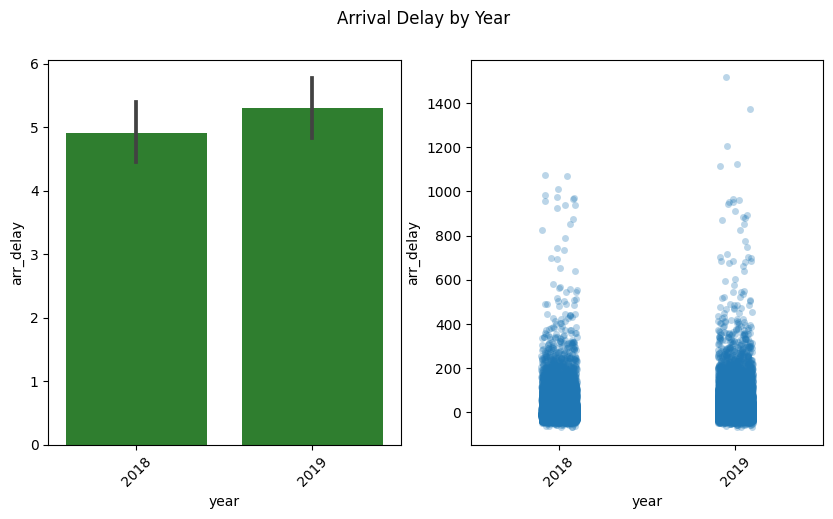

In [7]:
target_rel(data=df_train, feature='year', feature_title='Year', color='forestgreen')

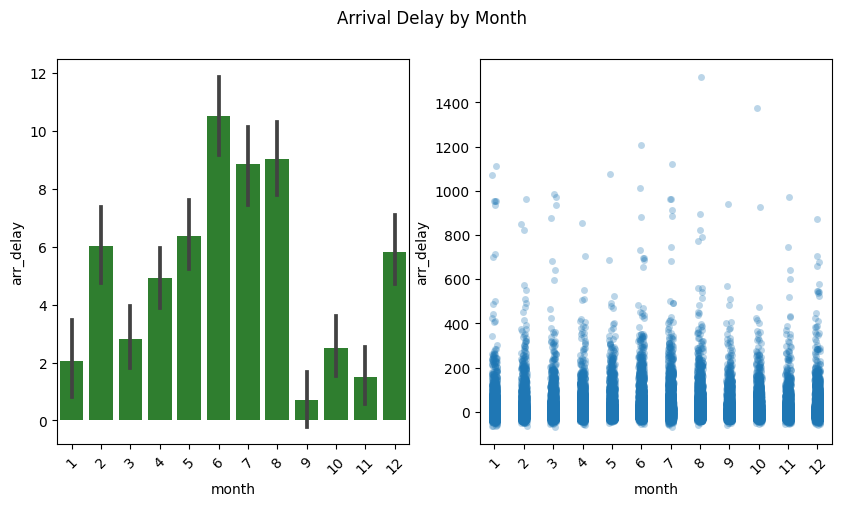

In [8]:
target_rel(data=df_train, feature='month', feature_title='Month', color='forestgreen')

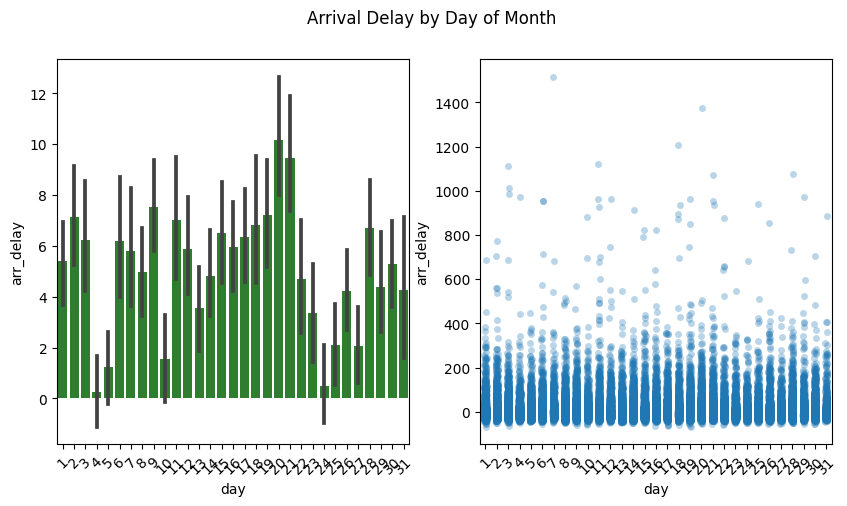

In [9]:
target_rel(data=df_train, feature='day', feature_title='Day of Month', color='forestgreen')

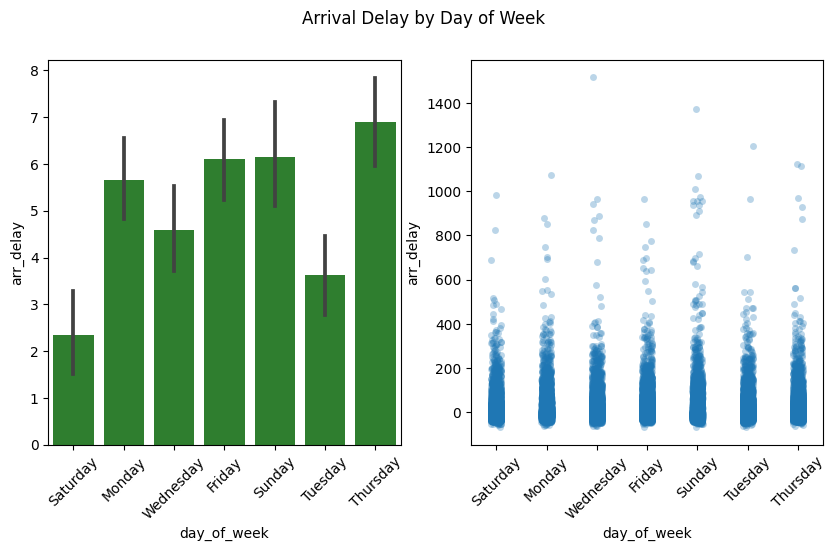

In [10]:
target_rel(data=df_train, feature='day_of_week', feature_title='Day of Week', color='forestgreen')

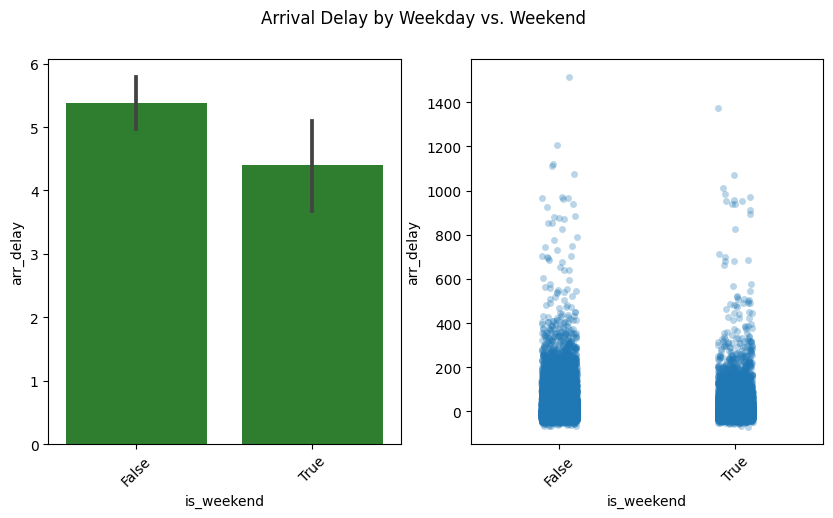

In [11]:
target_rel(data=df_train, feature='is_weekend', feature_title='Weekday vs. Weekend', color='forestgreen')

In [12]:
season_dict = {
    1:'Winter',
    2:'Winter',
    3:'Spring',
    4:'Spring',
    5:'Spring',
    6:'Summer',
    7:'Summer',
    8:'Summer',
    9:'Fall',
    10:'Fall',
    11:'Fall',
    12:'Winter'}
df_train["season"] = df_train["month"].map(season_dict)


In [13]:
with open(r'..\..\data\v2\season_dict.pickle','wb') as flight_data_file:
     pickle.dump(season_dict, flight_data_file)

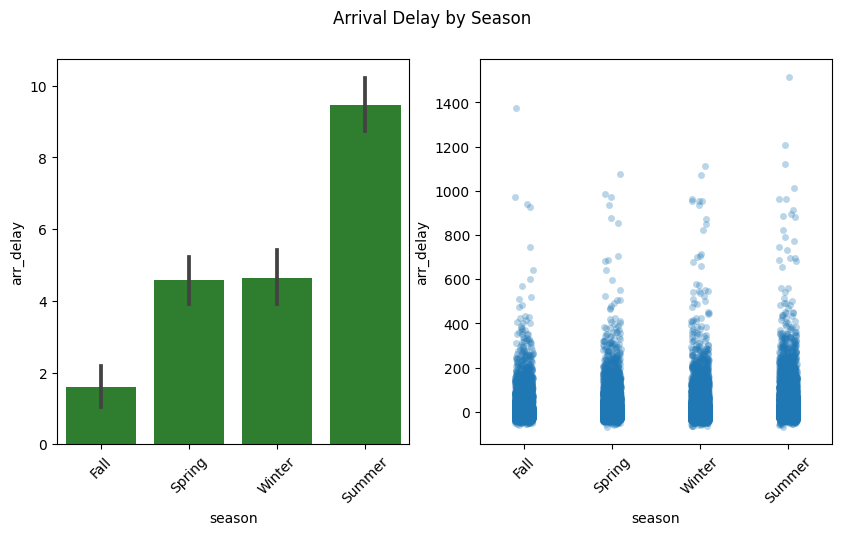

In [14]:
target_rel(data=df_train, feature='season', feature_title='Season', color='forestgreen')

In [15]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

dr = pd.date_range(start='2018-01-01', end='2019-12-31')

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

df_train['is_holiday'] = df_train['fl_date'].isin(holidays)

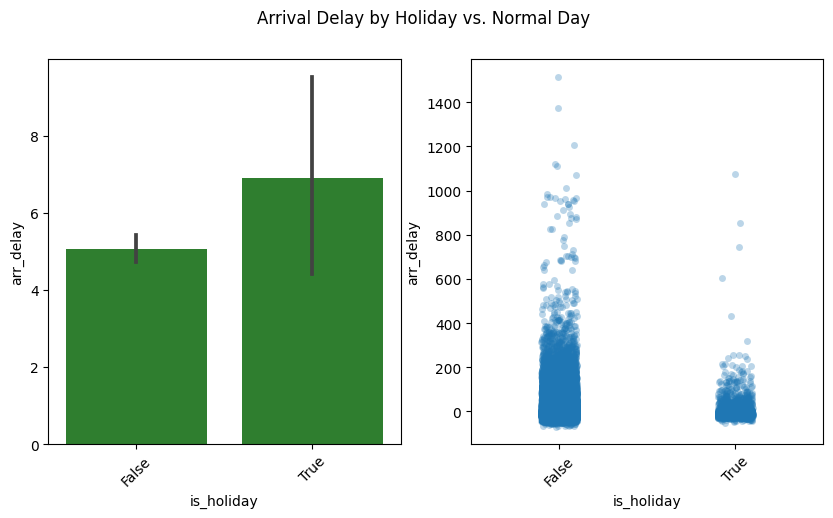

In [16]:
target_rel(data=df_train, feature='is_holiday', feature_title='Holiday vs. Normal Day', color='forestgreen')

### Features Based on Departure / Arrival Time

In [17]:
df_train['crs_dep_time_hour'] = df_train['crs_dep_time'].dt.hour
df_train['crs_arr_time_hour'] = df_train['crs_arr_time'].dt.hour

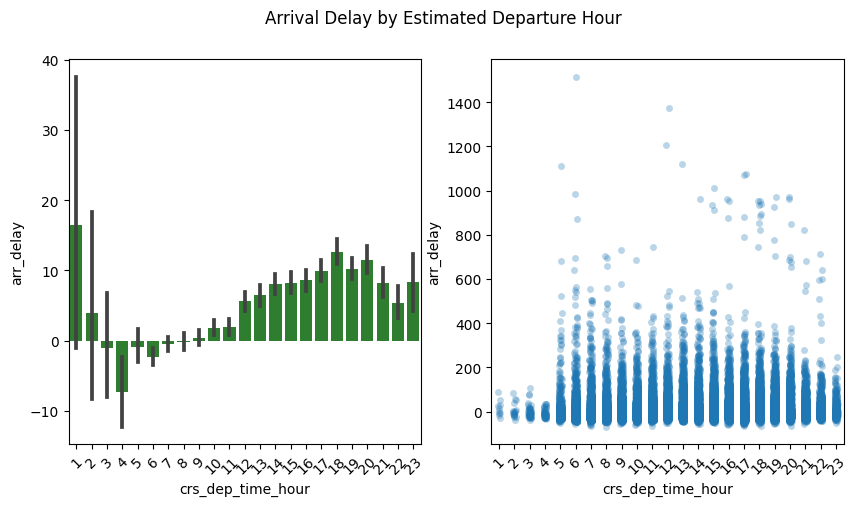

In [18]:
target_rel(data=df_train, feature='crs_dep_time_hour', feature_title='Estimated Departure Hour', color='forestgreen')

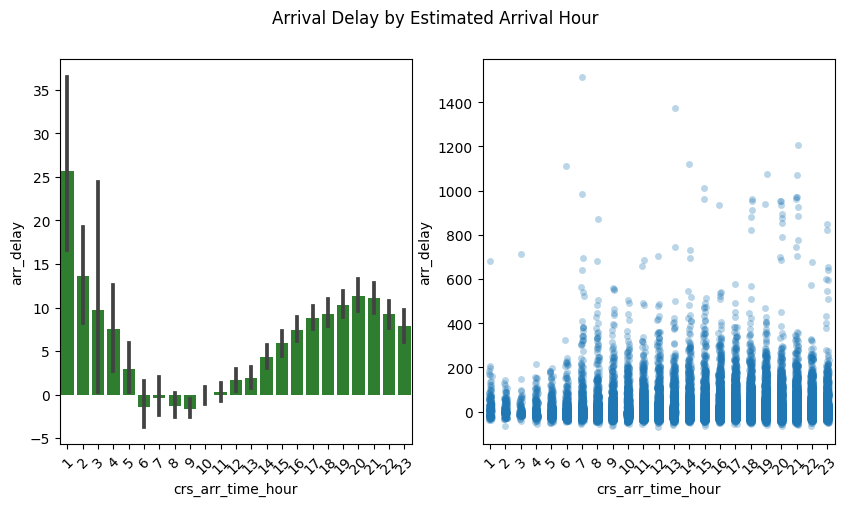

In [19]:
target_rel(data=df_train, feature='crs_arr_time_hour', feature_title='Estimated Arrival Hour', color='forestgreen')

In [20]:
cut_labels_5 = ['early morning', 'late morning', 'midday', 'late afternoon', 'evening']
cut_bins = [0, 5, 10, 15, 20, 24]
df_train['crs_dep_time_of_day'] = pd.cut(df_train['crs_dep_time_hour'], bins=cut_bins, labels=cut_labels_5)

cut_labels_5 = ['early morning', 'late morning', 'midday', 'late afternoon', 'evening']
cut_bins = [0, 5, 10, 15, 20, 24]
df_train['crs_arr_time_of_day'] = pd.cut(df_train['crs_arr_time_hour'], bins=cut_bins, labels=cut_labels_5)

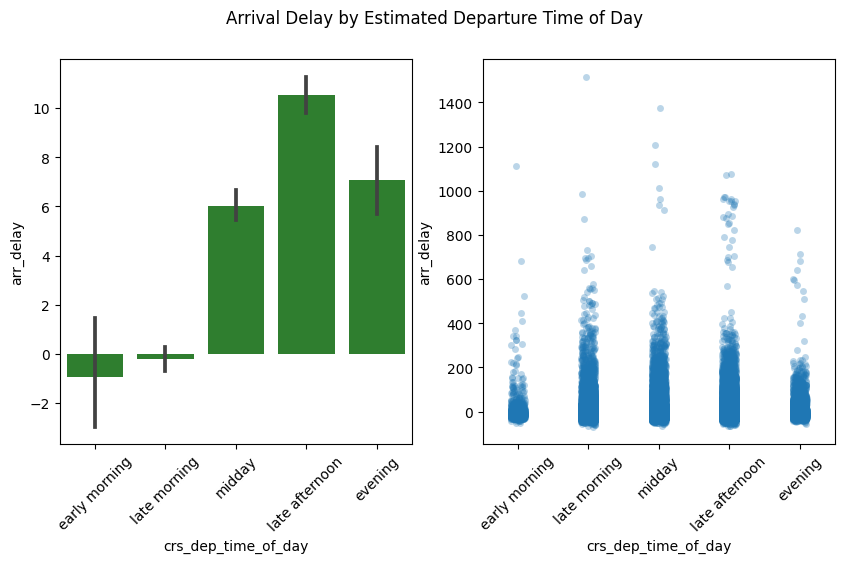

In [21]:
target_rel(data=df_train, feature='crs_dep_time_of_day', feature_title='Estimated Departure Time of Day', color='forestgreen')

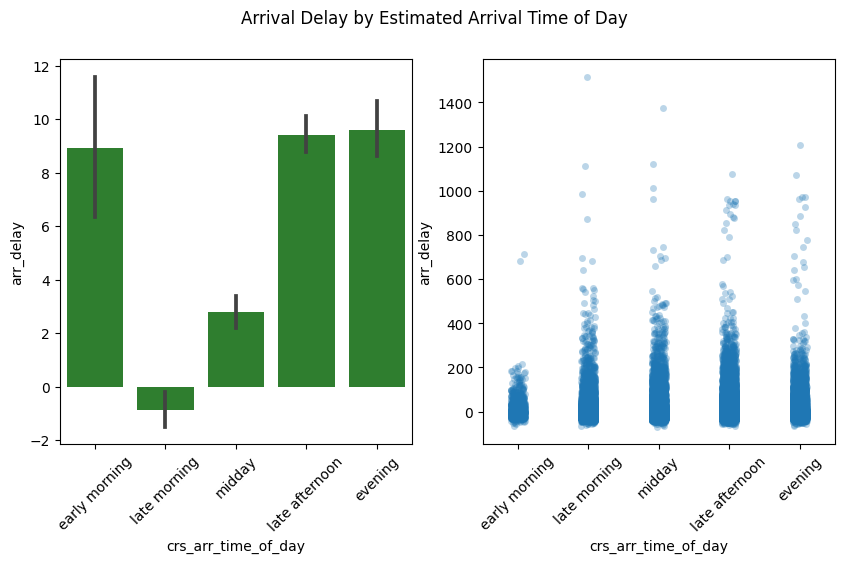

In [22]:
target_rel(data=df_train, feature='crs_arr_time_of_day', feature_title='Estimated Arrival Time of Day', color='forestgreen')

### Features Based on Origin / Destination

In [23]:
new_origin = df_train['origin_city_name'].str.split(",", n = 1, expand = True)
new_dest = df_train['dest_city_name'].str.split(",", n = 1, expand = True)
df_train['origin_state'] = new_origin[1].str.strip()
df_train['dest_state'] = new_dest[1].str.strip()

In [24]:
# Add a region feature that groups states into four regions
# Region Dictionary for States *includes DC and Puerto Rico

state_dict = {
    'WA': 'West',
    'OR': 'West',
    'CA': 'West',
    'AK': 'West',
    'HI': 'West',
    'ID': 'West',
    'MT': 'West',
    'WY': 'West',
    'NV': 'West',
    'UT': 'West',
    'CO': 'West',
    'AZ': 'West',
    'NM': 'West',
    'ND': 'Midwest',
    'SD': 'Midwest',
    'MN': 'Midwest',
    'NE': 'Midwest',
    'KS': 'Midwest',
    'IA': 'Midwest',
    'MO': 'Midwest',
    'WI': 'Midwest',
    'IL': 'Midwest',
    'MI': 'Midwest',
    'IN': 'Midwest',
    'OH': 'Midwest',
    'VT': 'Northeast',
    'ME': 'Northeast',
    'NH': 'Northeast',
    'MA': 'Northeast',
    'NY': 'Northeast',
    'PA': 'Northeast',
    'RI': 'Northeast',
    'CT': 'Northeast',
    'NJ': 'Northeast',
    'DE': 'South',
    'MD': 'South',
    'WV': 'South',
    'DC': 'South',
    'VA': 'South',
    'KY': 'South',
    'NC': 'South',
    'OK': 'South',
    'TX': 'South',
    'AR': 'South',
    'LA': 'South',
    'MS': 'South',
    'AL': 'South',
    'TN': 'South',
    'SC': 'South',
    'GA': 'South',
    'FL': 'South',
    'PR': 'Other',
    'VI': 'Other',
    'TT': 'Other'
}
len(state_dict)

54

In [25]:
import pickle

with open(r'..\..\data\v2\state_dict.pickle','wb') as flight_data_file:
     pickle.dump(state_dict, flight_data_file)

In [26]:
df_train["origin_region"] = df_train["origin_state"].map(state_dict)
df_train["dest_region"] = df_train["dest_state"].map(state_dict)

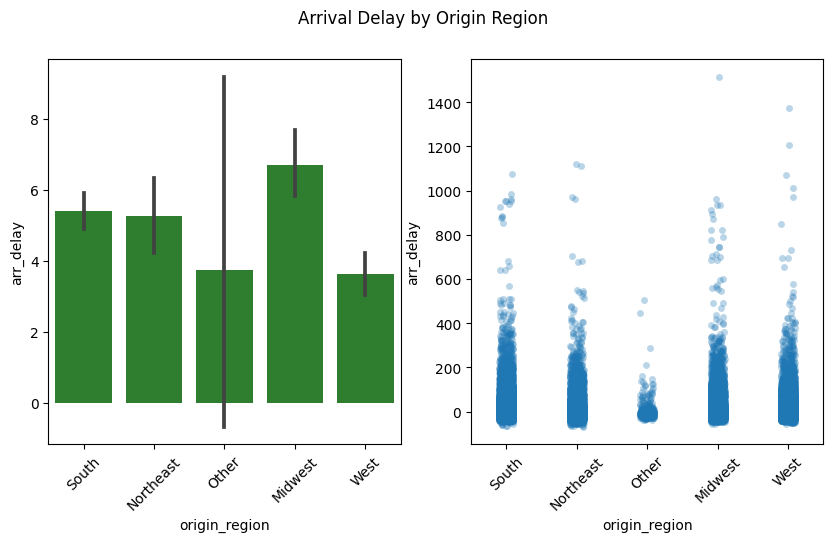

In [27]:
target_rel(data=df_train, feature='origin_region', feature_title='Origin Region', color='forestgreen')

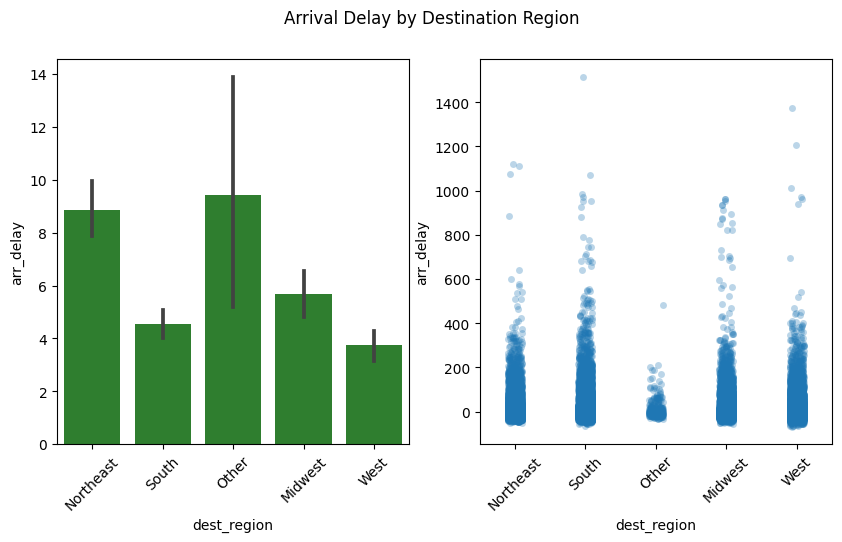

In [28]:
target_rel(data=df_train, feature='dest_region', feature_title='Destination Region', color='forestgreen')

In [29]:
df_train.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'year', 'month', 'day', 'day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_hour', 'crs_arr_time_hour',
       'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_state',
       'dest_state', 'origin_region', 'dest_region'],
      dtype='object')

In [30]:
# df_train['mean_mkt_carrier_delay'] = df_train.groupby(['mkt_unique_carrier'])['arr_delay'].transform('mean')
# df_train['mean_op_carrier_delay'] = df_train.groupby(['op_unique_carrier'])['arr_delay'].transform('mean')

# df_train['mean_origin_airport_delay'] = df_train.groupby(['origin_airport_id'])['arr_delay'].transform('mean')
# df_train['mean_dest_airport_delay'] = df_train.groupby(['dest_airport_id'])['arr_delay'].transform('mean')

# df_train['mean_flight_delay'] = df_train.groupby(['op_unique_carrier','op_carrier_fl_num','crs_dep_time_of_day','origin_city_name','dest_city_name'])['arr_delay'].transform('mean')

In [31]:
df_train.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,season,is_holiday,crs_dep_time_hour,crs_arr_time_hour,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region
0,2018-11-10,UA,UA,UA,1972,UA,N483UA,1972,12264,IAD,...,Fall,False,17,18,late afternoon,late afternoon,DC,NJ,South,Northeast
1,2018-10-08,AA,AA_CODESHARE,AA,4881,PT,N630AE,4881,13230,MDT,...,Fall,True,10,11,late morning,midday,PA,PA,Northeast,Northeast
2,2019-04-10,AA,AA_CODESHARE,AA,5394,OH,N589NN,5394,14100,PHL,...,Spring,False,17,19,late afternoon,late afternoon,PA,SC,Northeast,South
3,2019-04-26,B6,B6,B6,1035,B6,N527JL,1035,15024,STT,...,Spring,False,9,10,late morning,late morning,VI,PR,Other,Other
4,2018-02-14,WN,WN,WN,6572,WN,N204WN,6572,13232,MDW,...,Winter,False,5,9,early morning,late morning,IL,FL,Midwest,South


In [32]:
# sns.scatterplot(data=df_train, x='mean_mkt_carrier_delay', y='arr_delay', hue= 'mkt_unique_carrier', alpha=0.3)
# plt.legend(loc = 'upper left')

In [33]:
# sns.scatterplot(data=df_train, x='mean_op_carrier_delay', y='arr_delay', alpha=0.3)

In [34]:
# sns.scatterplot(data=df_train, x='mean_origin_airport_delay', y='arr_delay', alpha=0.3)

In [35]:
# sns.scatterplot(data=df_train, x='mean_dest_airport_delay', y='arr_delay', alpha=0.3)

In [36]:
# sns.scatterplot(data=df_train, x='mean_flight_delay', y='arr_delay')

In [37]:
# filter_df = df_train[df_train['arr_delay'] != df_train['mean_flight_delay']]

In [38]:
# sns.scatterplot(data=filter_df, x='mean_flight_delay', y='arr_delay')

In [39]:
# filter_df['arr_delay'].corr(filter_df['mean_flight_delay'])

### Make a pickle of the feature engineered training set

In [40]:
with open(r'..\..\data\v2\df_train_step2_fulloutput.pickle','wb') as flight_data_file:
     pickle.dump(df_train, flight_data_file)

In [41]:
feat_iteration1 = df_train[['day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_region', 'dest_region', 'arr_delay']]

In [42]:
with open(r'..\..\data\v2\df_train_step2_subset1.pickle','wb') as flight_data_file:
     pickle.dump(feat_iteration1, flight_data_file)

# Add Features to Training Set - Iteration 2

In [1]:
import pickle

with open(r'..\..\data\v2\df_train_step2_fulloutput.pickle','rb') as flight_data_file:
     df_train = pickle.load(flight_data_file)

In [2]:
df_train.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,season,is_holiday,crs_dep_time_hour,crs_arr_time_hour,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region
0,2018-11-10,UA,UA,UA,1972,UA,N483UA,1972,12264,IAD,...,Fall,False,17,18,late afternoon,late afternoon,DC,NJ,South,Northeast
1,2018-10-08,AA,AA_CODESHARE,AA,4881,PT,N630AE,4881,13230,MDT,...,Fall,True,10,11,late morning,midday,PA,PA,Northeast,Northeast
2,2019-04-10,AA,AA_CODESHARE,AA,5394,OH,N589NN,5394,14100,PHL,...,Spring,False,17,19,late afternoon,late afternoon,PA,SC,Northeast,South
3,2019-04-26,B6,B6,B6,1035,B6,N527JL,1035,15024,STT,...,Spring,False,9,10,late morning,late morning,VI,PR,Other,Other
4,2018-02-14,WN,WN,WN,6572,WN,N204WN,6572,13232,MDW,...,Winter,False,5,9,early morning,late morning,IL,FL,Midwest,South


### Features based on Mean Arrival Delay by Group

In [3]:
df_train.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'year', 'month', 'day', 'day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_hour', 'crs_arr_time_hour',
       'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_state',
       'dest_state', 'origin_region', 'dest_region'],
      dtype='object')

In [31]:
mean_mkt_carrier_delay = df_train.groupby('mkt_unique_carrier', as_index=False)['arr_delay'].mean()
mean_mkt_carrier_delay.set_index('mkt_unique_carrier',inplace=True)
mean_mkt_carrier_delay = mean_mkt_carrier_delay.T
mean_mkt_carrier_delay

mkt_unique_carrier,AA,AS,B6,DL,F9,G4,HA,NK,UA,WN
arr_delay,5.933842,1.888352,8.699325,2.089376,11.585691,6.526688,-1.26383,5.415423,8.874947,3.239038


In [32]:
mkt_carrier_delay_dict = mean_mkt_carrier_delay.to_dict('records')

In [33]:
mkt_carrier_delay_dict

[{'AA': 5.933842375053396,
  'AS': 1.888352444176222,
  'B6': 8.69932540957276,
  'DL': 2.089376457224846,
  'F9': 11.585690515806988,
  'G4': 6.52668759811617,
  'HA': -1.2638297872340425,
  'NK': 5.41542288557214,
  'UA': 8.874946770759404,
  'WN': 3.2390375178090864}]

In [34]:
with open(r'..\..\data\v2\mkt_carrier_delay_dict.pickle','wb') as flight_data_file:
     pickle.dump(mkt_carrier_delay_dict, flight_data_file)

In [18]:
df_train['arr_delay'].mean()

5.115402956604673

In [47]:
df_train['mean_mkt_carrier_delay'] = df_train['mkt_unique_carrier'].map(mkt_carrier_delay_dict[0])
df_train['mean_mkt_carrier_delay'] = df_train['mean_mkt_carrier_delay'].fillna(5.115402956604673) # overall mean delay

In [48]:
df_train.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,is_holiday,crs_dep_time_hour,crs_arr_time_hour,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,mean_mkt_carrier_delay
0,2018-11-10,UA,UA,UA,1972,UA,N483UA,1972,12264,IAD,...,False,17,18,late afternoon,late afternoon,DC,NJ,South,Northeast,8.874947
1,2018-10-08,AA,AA_CODESHARE,AA,4881,PT,N630AE,4881,13230,MDT,...,True,10,11,late morning,midday,PA,PA,Northeast,Northeast,5.933842
2,2019-04-10,AA,AA_CODESHARE,AA,5394,OH,N589NN,5394,14100,PHL,...,False,17,19,late afternoon,late afternoon,PA,SC,Northeast,South,5.933842
3,2019-04-26,B6,B6,B6,1035,B6,N527JL,1035,15024,STT,...,False,9,10,late morning,late morning,VI,PR,Other,Other,8.699325
4,2018-02-14,WN,WN,WN,6572,WN,N204WN,6572,13232,MDW,...,False,5,9,early morning,late morning,IL,FL,Midwest,South,3.239038


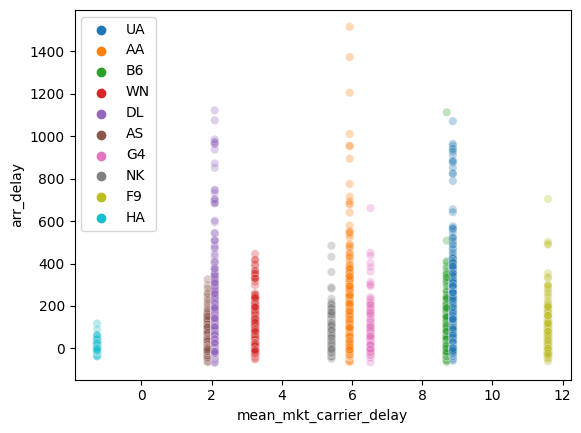

In [49]:
sns.scatterplot(data=df_train, x='mean_mkt_carrier_delay', y='arr_delay', hue= 'mkt_unique_carrier', alpha=0.3)
plt.legend(loc = 'upper left')

In [50]:
mean_op_carrier_delay = df_train.groupby('op_unique_carrier', as_index=False)['arr_delay'].mean()
mean_op_carrier_delay.set_index('op_unique_carrier',inplace=True)
mean_op_carrier_delay = mean_op_carrier_delay.T
mean_op_carrier_delay

op_unique_carrier,9E,9K,AA,AS,AX,B6,C5,CP,DL,EM,...,NK,OH,OO,PT,QX,UA,WN,YV,YX,ZW
arr_delay,4.118736,-6.111111,6.252554,2.570225,9.8192,8.699325,24.057143,3.821724,0.049376,4.268293,...,5.415423,4.264744,7.113793,6.612603,1.742525,6.733834,3.239038,12.116267,1.927913,8.578326


In [51]:
op_carrier_delay_dict = mean_op_carrier_delay.to_dict('records')

In [52]:
op_carrier_delay_dict

[{'9E': 4.1187355435620665,
  '9K': -6.111111111111111,
  'AA': 6.252554420257663,
  'AS': 2.5702247191011236,
  'AX': 9.8192,
  'B6': 8.69932540957276,
  'C5': 24.057142857142857,
  'CP': 3.82172373081464,
  'DL': 0.0493761894692324,
  'EM': 4.2682926829268295,
  'EV': 7.650925335035099,
  'F9': 11.585690515806988,
  'G4': 6.52668759811617,
  'G7': 13.312101910828025,
  'HA': -1.605421686746988,
  'KS': 10.307692307692308,
  'MQ': 5.86980306345733,
  'NK': 5.41542288557214,
  'OH': 4.264743865690917,
  'OO': 7.113792638533099,
  'PT': 6.612603305785124,
  'QX': 1.7425249169435215,
  'UA': 6.733833511968561,
  'WN': 3.2390375178090864,
  'YV': 12.116266666666666,
  'YX': 1.9279134961954345,
  'ZW': 8.57832618025751}]

In [53]:
with open(r'..\..\data\v2\op_carrier_delay_dict.pickle','wb') as flight_data_file:
     pickle.dump(op_carrier_delay_dict, flight_data_file)

In [54]:
df_train['mean_op_carrier_delay'] = df_train['op_unique_carrier'].map(op_carrier_delay_dict[0])
df_train['mean_op_carrier_delay'] = df_train['mean_op_carrier_delay'].fillna(5.115402956604673) # overall mean delay

In [55]:
df_train.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_dep_time_hour,crs_arr_time_hour,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,mean_mkt_carrier_delay,mean_op_carrier_delay
0,2018-11-10,UA,UA,UA,1972,UA,N483UA,1972,12264,IAD,...,17,18,late afternoon,late afternoon,DC,NJ,South,Northeast,8.874947,6.733834
1,2018-10-08,AA,AA_CODESHARE,AA,4881,PT,N630AE,4881,13230,MDT,...,10,11,late morning,midday,PA,PA,Northeast,Northeast,5.933842,6.612603
2,2019-04-10,AA,AA_CODESHARE,AA,5394,OH,N589NN,5394,14100,PHL,...,17,19,late afternoon,late afternoon,PA,SC,Northeast,South,5.933842,4.264744
3,2019-04-26,B6,B6,B6,1035,B6,N527JL,1035,15024,STT,...,9,10,late morning,late morning,VI,PR,Other,Other,8.699325,8.699325
4,2018-02-14,WN,WN,WN,6572,WN,N204WN,6572,13232,MDW,...,5,9,early morning,late morning,IL,FL,Midwest,South,3.239038,3.239038


<AxesSubplot: xlabel='op_unique_carrier', ylabel='arr_delay'>

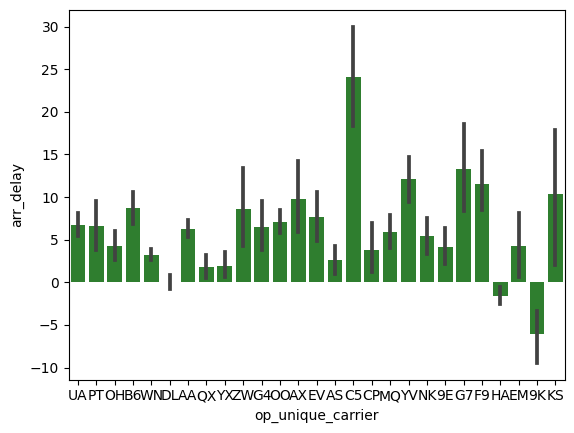

In [59]:
sns.barplot(data=df_train, x='op_unique_carrier', y='arr_delay', color='forestgreen')

### Make a pickle of the feature engineered training set

In [66]:
with open(r'..\..\data\v2\df_train_step2_fulloutput2.pickle','wb') as flight_data_file:
     pickle.dump(df_train, flight_data_file)

In [67]:
feat_iteration2 = df_train[['day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_region', 'dest_region','mean_mkt_carrier_delay','mean_op_carrier_delay', 'arr_delay']]

In [68]:
with open(r'..\..\data\v2\df_train_step2_subset2.pickle','wb') as flight_data_file:
     pickle.dump(feat_iteration2, flight_data_file)

# Add Features to Training Set - Iteration 3

In [69]:
import pickle

with open(r'..\..\data\v2\df_train_step2_fulloutput2.pickle','rb') as flight_data_file:
     df_train = pickle.load(flight_data_file)

In [70]:
df_train.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_dep_time_hour,crs_arr_time_hour,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,mean_mkt_carrier_delay,mean_op_carrier_delay
0,2018-11-10,UA,UA,UA,1972,UA,N483UA,1972,12264,IAD,...,17,18,late afternoon,late afternoon,DC,NJ,South,Northeast,8.874947,6.733834
1,2018-10-08,AA,AA_CODESHARE,AA,4881,PT,N630AE,4881,13230,MDT,...,10,11,late morning,midday,PA,PA,Northeast,Northeast,5.933842,6.612603
2,2019-04-10,AA,AA_CODESHARE,AA,5394,OH,N589NN,5394,14100,PHL,...,17,19,late afternoon,late afternoon,PA,SC,Northeast,South,5.933842,4.264744
3,2019-04-26,B6,B6,B6,1035,B6,N527JL,1035,15024,STT,...,9,10,late morning,late morning,VI,PR,Other,Other,8.699325,8.699325
4,2018-02-14,WN,WN,WN,6572,WN,N204WN,6572,13232,MDW,...,5,9,early morning,late morning,IL,FL,Midwest,South,3.239038,3.239038


### Features based on Mean Arrival Delay by Group

In [ ]:
df_train.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'year', 'month', 'day', 'day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_hour', 'crs_arr_time_hour',
       'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_state',
       'dest_state', 'origin_region', 'dest_region'],
      dtype='object')

In [93]:
mean_route_delay = df_train.groupby(['origin','dest'], as_index=False)['arr_delay'].mean()
mean_route_delay['route'] = mean_route_delay['origin'] + mean_route_delay['dest']
mean_route_delay.drop(columns = ['origin','dest'], inplace=True)
mean_route_delay.set_index('route',inplace=True)
mean_route_delay = mean_route_delay.T
mean_route_delay

route,ABEATL,ABECLT,ABEDTW,ABEFLL,ABEMYR,ABEORD,ABEPGD,ABEPHL,ABEPIE,ABESFB,...,XNAMSP,XNAORD,XNASFB,XNASFO,XNAVPS,XWADEN,YAKJNU,YKMSEA,YUMDFW,YUMPHX
arr_delay,-11.166667,-7.4,62.875,-17.0,-9.0,14.333333,-8.0,-9.0,-5.0,29.555556,...,-17.0,15.115385,218.0,28.0,-31.0,-22.5,-5.0,20.9,4.333333,2.5625


In [94]:
route_delay_dict = mean_route_delay.to_dict('records')

In [95]:
route_delay_dict

[{'ABEATL': -11.166666666666666,
  'ABECLT': -7.4,
  'ABEDTW': 62.875,
  'ABEFLL': -17.0,
  'ABEMYR': -9.0,
  'ABEORD': 14.333333333333334,
  'ABEPGD': -8.0,
  'ABEPHL': -9.0,
  'ABEPIE': -5.0,
  'ABESFB': 29.555555555555557,
  'ABIDFW': -10.357142857142858,
  'ABQATL': -12.3,
  'ABQAUS': -11.0,
  'ABQBWI': 3.75,
  'ABQDAL': -0.7777777777777778,
  'ABQDEN': 10.633333333333333,
  'ABQDFW': 3.8518518518518516,
  'ABQHOU': 12.882352941176471,
  'ABQIAH': 3.6666666666666665,
  'ABQJFK': -20.5,
  'ABQLAS': -4.947368421052632,
  'ABQLAX': 19.586206896551722,
  'ABQMCI': -6.2,
  'ABQMCO': -9.5,
  'ABQMDW': -0.7,
  'ABQMSP': -4.0,
  'ABQOAK': 16.818181818181817,
  'ABQORD': 25.615384615384617,
  'ABQPDX': -9.25,
  'ABQPHX': 19.428571428571427,
  'ABQSAN': 3.0,
  'ABQSEA': -17.5,
  'ABQSFO': 24.875,
  'ABQSJC': 32.0,
  'ABQSLC': -10.571428571428571,
  'ABQSNA': 16.0,
  'ABRMSP': -17.428571428571427,
  'ABYATL': -12.875,
  'ACKDCA': -18.0,
  'ACKEWR': 31.0,
  'ACKJFK': 9.333333333333334,
  'ACTD

In [96]:
with open(r'..\..\data\v2\route_delay_dict.pickle','wb') as flight_data_file:
     pickle.dump(route_delay_dict, flight_data_file)

In [ ]:
df_train['arr_delay'].mean()

5.115402956604673

In [97]:
df_train['route'] = df_train['origin'] + df_train['dest']
df_train['mean_route_delay'] = df_train['route'].map(route_delay_dict[0])
df_train['mean_route_delay'] = df_train['mean_route_delay'].fillna(5.115402956604673) # overall mean delay

In [98]:
df_train.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,mean_mkt_carrier_delay,mean_op_carrier_delay,route,mean_route_delay
0,2018-11-10,UA,UA,UA,1972,UA,N483UA,1972,12264,IAD,...,late afternoon,late afternoon,DC,NJ,South,Northeast,8.874947,6.733834,IADEWR,47.157895
1,2018-10-08,AA,AA_CODESHARE,AA,4881,PT,N630AE,4881,13230,MDT,...,late morning,midday,PA,PA,Northeast,Northeast,5.933842,6.612603,MDTPHL,10.090909
2,2019-04-10,AA,AA_CODESHARE,AA,5394,OH,N589NN,5394,14100,PHL,...,late afternoon,late afternoon,PA,SC,Northeast,South,5.933842,4.264744,PHLGSP,4.111111
3,2019-04-26,B6,B6,B6,1035,B6,N527JL,1035,15024,STT,...,late morning,late morning,VI,PR,Other,Other,8.699325,8.699325,STTSJU,6.785714
4,2018-02-14,WN,WN,WN,6572,WN,N204WN,6572,13232,MDW,...,early morning,late morning,IL,FL,Midwest,South,3.239038,3.239038,MDWMCO,16.407407


In [112]:
delay_compare = pd.DataFrame(df_train['arr_delay'].to_numpy(),df_train['mean_route_delay'])
delay_compare

,0
mean_route_delay,
47.157895,-3.0
10.090909,-7.0
4.111111,-20.0
6.785714,-28.0
16.407407,-24.0
...,...
16.423529,25.0
0.625000,-16.0
0.764706,-21.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


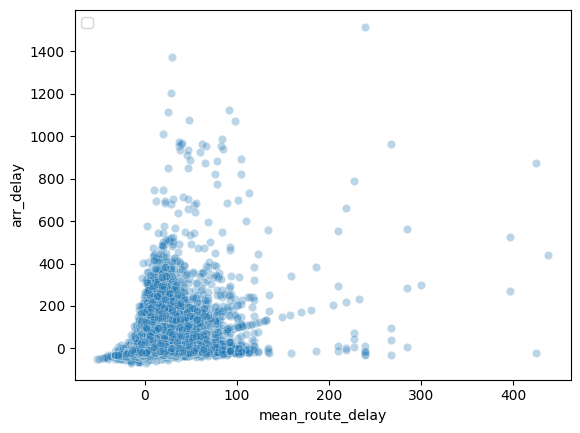

In [99]:
sns.scatterplot(data=df_train, x='mean_route_delay', y='arr_delay', alpha=0.3)
plt.legend(loc = 'upper left')

<AxesSubplot: xlabel='route', ylabel='arr_delay'>

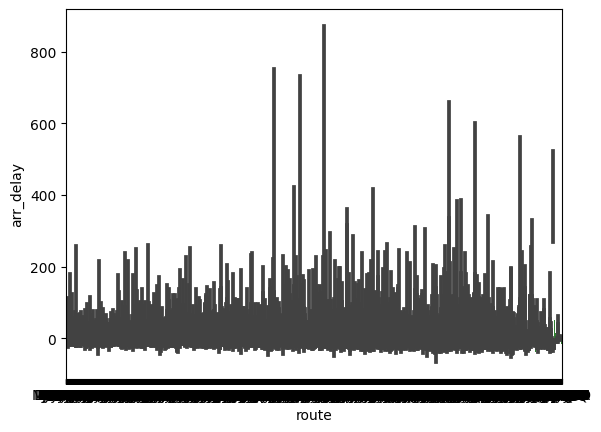

In [100]:
sns.barplot(data=df_train, x='route', y='arr_delay', color='forestgreen')

### Make a pickle of the feature engineered training set

In [101]:
with open(r'..\..\data\v2\df_train_step2_fulloutput3.pickle','wb') as flight_data_file:
     pickle.dump(df_train, flight_data_file)

In [102]:
feat_iteration2 = df_train[['day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_region', 'dest_region','mean_mkt_carrier_delay','mean_op_carrier_delay', 'mean_route_delay','arr_delay']]

In [103]:
with open(r'..\..\data\v2\df_train_step2_subset3.pickle','wb') as flight_data_file:
     pickle.dump(feat_iteration2, flight_data_file)

# Add Features to Test Set - Iteration 1

In [43]:
with open(r'..\..\data\v2\df_test_step1output.pickle','rb') as flight_data_file:
     df_test = pickle.load(flight_data_file)

In [44]:
df_test['year'] = df_test['fl_date'].dt.year
df_test['month'] = df_test['fl_date'].dt.month
df_test['day'] = df_test['fl_date'].dt.day
df_test['day_of_week'] = df_test['fl_date'].dt.day_name()
df_test["is_weekend"] = df_test['fl_date'].dt.dayofweek > 4

In [45]:
with open(r'..\..\data\v2\season_dict.pickle','rb') as flight_data_file:
     season_dict = pickle.load(flight_data_file)

In [46]:
df_test["season"] = df_test["month"].map(season_dict)

In [47]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

dr = pd.date_range(start='2018-01-01', end='2019-12-31')

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

df_test['is_holiday'] = df_test['fl_date'].isin(holidays)

In [48]:
df_test['crs_dep_time_hour'] = df_test['crs_dep_time'].dt.hour
df_test['crs_arr_time_hour'] = df_test['crs_arr_time'].dt.hour

In [49]:
cut_labels_5 = ['early morning', 'late morning', 'midday', 'late afternoon', 'evening']
cut_bins = [0, 5, 10, 15, 20, 24]
df_test['crs_dep_time_of_day'] = pd.cut(df_test['crs_dep_time_hour'], bins=cut_bins, labels=cut_labels_5)

cut_labels_5 = ['early morning', 'late morning', 'midday', 'late afternoon', 'evening']
cut_bins = [0, 5, 10, 15, 20, 24]
df_test['crs_arr_time_of_day'] = pd.cut(df_test['crs_arr_time_hour'], bins=cut_bins, labels=cut_labels_5)

In [50]:
new_origin = df_test['origin_city_name'].str.split(",", n = 1, expand = True)
new_dest = df_test['dest_city_name'].str.split(",", n = 1, expand = True)
df_test['origin_state'] = new_origin[1].str.strip()
df_test['dest_state'] = new_dest[1].str.strip()

In [51]:
with open(r'..\..\data\v2\state_dict.pickle','rb') as flight_data_file:
     state_dict = pickle.load(flight_data_file)

In [52]:
df_test["origin_region"] = df_test["origin_state"].map(state_dict)
df_test["dest_region"] = df_test["dest_state"].map(state_dict)

In [53]:
# df_test['mean_mkt_carrier_delay'] = df_test.groupby(['mkt_unique_carrier'])['arr_delay'].transform('mean')
# df_test['mean_op_carrier_delay'] = df_test.groupby(['op_unique_carrier'])['arr_delay'].transform('mean')

# df_test['mean_origin_airport_delay'] = df_test.groupby(['origin_airport_id'])['arr_delay'].transform('mean')
# df_test['mean_dest_airport_delay'] = df_test.groupby(['dest_airport_id'])['arr_delay'].transform('mean')

# df_test['mean_flight_delay'] = df_test.groupby(['op_unique_carrier','op_carrier_fl_num','crs_dep_time_of_day','origin_city_name','dest_city_name'])['arr_delay'].transform('mean')

In [54]:
df_test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,season,is_holiday,crs_dep_time_hour,crs_arr_time_hour,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region
0,2018-06-01,DL,DL,DL,840,DL,N918DH,840,12339,IND,...,Summer,False,18,18,late afternoon,late afternoon,IN,MN,Midwest,Midwest
1,2019-05-25,DL,DL,DL,1348,DL,N907DE,1348,10397,ATL,...,Spring,False,22,23,evening,evening,GA,NE,South,Midwest
2,2019-06-03,WN,WN,WN,284,WN,N432WN,284,14893,SMF,...,Summer,False,6,7,late morning,late morning,CA,CA,West,West
3,2019-09-20,WN,WN,WN,168,WN,N215WN,168,13204,MCO,...,Fall,False,8,10,late morning,late morning,FL,NY,South,Northeast
4,2019-12-13,AA,AA_CODESHARE,AA,4742,PT,N645AE,4742,10721,BOS,...,Winter,False,19,20,late afternoon,late afternoon,MA,NY,Northeast,Northeast


### Make a pickle of the feature engineered test set

In [55]:
with open(r'..\..\data\v2\df_test_step2_fulloutput.pickle','wb') as flight_data_file:
     pickle.dump(df_test, flight_data_file)

In [56]:
feat_iteration1 = df_test[['day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_region', 'dest_region', 'arr_delay']]

In [57]:
with open(r'..\..\data\v2\df_test_step2_subset1.pickle','wb') as flight_data_file:
     pickle.dump(feat_iteration1, flight_data_file)

# Add Features to Test Set - Iteration 2

In [1]:
import pickle

with open(r'..\..\data\v2\df_test_step2_fulloutput.pickle','rb') as flight_data_file:
     df_test = pickle.load(flight_data_file)

In [2]:
with open(r'..\..\data\v2\mkt_carrier_delay_dict.pickle','rb') as flight_data_file:
     mkt_carrier_delay_dict = pickle.load(flight_data_file)

In [3]:
df_test['mean_mkt_carrier_delay'] = df_test['mkt_unique_carrier'].map(mkt_carrier_delay_dict[0])
df_test['mean_mkt_carrier_delay'] = df_test['mean_mkt_carrier_delay'].fillna(5.115402956604673) # overall mean delay

In [4]:
df_test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,is_holiday,crs_dep_time_hour,crs_arr_time_hour,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,mean_mkt_carrier_delay
0,2018-06-01,DL,DL,DL,840,DL,N918DH,840,12339,IND,...,False,18,18,late afternoon,late afternoon,IN,MN,Midwest,Midwest,2.089376
1,2019-05-25,DL,DL,DL,1348,DL,N907DE,1348,10397,ATL,...,False,22,23,evening,evening,GA,NE,South,Midwest,2.089376
2,2019-06-03,WN,WN,WN,284,WN,N432WN,284,14893,SMF,...,False,6,7,late morning,late morning,CA,CA,West,West,3.239038
3,2019-09-20,WN,WN,WN,168,WN,N215WN,168,13204,MCO,...,False,8,10,late morning,late morning,FL,NY,South,Northeast,3.239038
4,2019-12-13,AA,AA_CODESHARE,AA,4742,PT,N645AE,4742,10721,BOS,...,False,19,20,late afternoon,late afternoon,MA,NY,Northeast,Northeast,5.933842


In [5]:
with open(r'..\..\data\v2\op_carrier_delay_dict.pickle','rb') as flight_data_file:
     op_carrier_delay_dict = pickle.load(flight_data_file)

In [6]:
df_test['mean_op_carrier_delay'] = df_test['op_unique_carrier'].map(op_carrier_delay_dict[0])
df_test['mean_op_carrier_delay'] = df_test['mean_op_carrier_delay'].fillna(5.115402956604673) # overall mean delay

In [7]:
df_test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_dep_time_hour,crs_arr_time_hour,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,mean_mkt_carrier_delay,mean_op_carrier_delay
0,2018-06-01,DL,DL,DL,840,DL,N918DH,840,12339,IND,...,18,18,late afternoon,late afternoon,IN,MN,Midwest,Midwest,2.089376,0.049376
1,2019-05-25,DL,DL,DL,1348,DL,N907DE,1348,10397,ATL,...,22,23,evening,evening,GA,NE,South,Midwest,2.089376,0.049376
2,2019-06-03,WN,WN,WN,284,WN,N432WN,284,14893,SMF,...,6,7,late morning,late morning,CA,CA,West,West,3.239038,3.239038
3,2019-09-20,WN,WN,WN,168,WN,N215WN,168,13204,MCO,...,8,10,late morning,late morning,FL,NY,South,Northeast,3.239038,3.239038
4,2019-12-13,AA,AA_CODESHARE,AA,4742,PT,N645AE,4742,10721,BOS,...,19,20,late afternoon,late afternoon,MA,NY,Northeast,Northeast,5.933842,6.612603


### Make a pickle of the feature engineered test set

In [11]:
with open(r'..\..\data\v2\df_test_step2_fulloutput2.pickle','wb') as flight_data_file:
     pickle.dump(df_test, flight_data_file)

In [12]:
feat_iteration2 = df_test[['day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_region', 'dest_region', 'mean_mkt_carrier_delay','mean_op_carrier_delay','arr_delay']]

In [13]:
with open(r'..\..\data\v2\df_test_step2_subset2.pickle','wb') as flight_data_file:
     pickle.dump(feat_iteration2, flight_data_file)

### Make a pickle of the feature engineered test set

In [ ]:
with open(r'..\..\data\v2\df_test_step2_fulloutput.pickle','wb') as flight_data_file:
     pickle.dump(df_test, flight_data_file)

In [ ]:
feat_iteration1 = df_test[['day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_region', 'dest_region', 'arr_delay']]

In [ ]:
with open(r'..\..\data\v2\df_test_step2_subset1.pickle','wb') as flight_data_file:
     pickle.dump(feat_iteration1, flight_data_file)

# Add Features to Test Set - Iteration 3

In [104]:
import pickle

with open(r'..\..\data\v2\df_test_step2_fulloutput2.pickle','rb') as flight_data_file:
     df_test = pickle.load(flight_data_file)

In [105]:
with open(r'..\..\data\v2\route_delay_dict.pickle','rb') as flight_data_file:
     route_delay_dict = pickle.load(flight_data_file)

In [106]:
df_test['route'] = df_test['origin'] + df_test['dest']
df_test['mean_route_delay'] = df_test['route'].map(route_delay_dict[0])
df_test['mean_route_delay'] = df_test['mean_route_delay'].fillna(5.115402956604673) # overall mean delay

In [107]:
df_test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_dep_time_of_day,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,mean_mkt_carrier_delay,mean_op_carrier_delay,route,mean_route_delay
0,2018-06-01,DL,DL,DL,840,DL,N918DH,840,12339,IND,...,late afternoon,late afternoon,IN,MN,Midwest,Midwest,2.089376,0.049376,INDMSP,9.125000
1,2019-05-25,DL,DL,DL,1348,DL,N907DE,1348,10397,ATL,...,evening,evening,GA,NE,South,Midwest,2.089376,0.049376,ATLOMA,4.000000
2,2019-06-03,WN,WN,WN,284,WN,N432WN,284,14893,SMF,...,late morning,late morning,CA,CA,West,West,3.239038,3.239038,SMFBUR,-2.250000
3,2019-09-20,WN,WN,WN,168,WN,N215WN,168,13204,MCO,...,late morning,late morning,FL,NY,South,Northeast,3.239038,3.239038,MCOROC,-12.333333
4,2019-12-13,AA,AA_CODESHARE,AA,4742,PT,N645AE,4742,10721,BOS,...,late afternoon,late afternoon,MA,NY,Northeast,Northeast,5.933842,6.612603,BOSSYR,-11.000000


### Make a pickle of the feature engineered test set

In [ ]:
with open(r'..\..\data\v2\df_test_step2_fulloutput3.pickle','wb') as flight_data_file:
     pickle.dump(df_test, flight_data_file)

In [109]:
feat_iteration3 = df_test[['day_of_week', 'is_weekend',
       'season', 'is_holiday', 'crs_dep_time_of_day', 'crs_arr_time_of_day', 'origin_region', 'dest_region', 'mean_mkt_carrier_delay','mean_op_carrier_delay','mean_route_delay','arr_delay']]

In [110]:
with open(r'..\..\data\v2\df_test_step2_subset3.pickle','wb') as flight_data_file:
     pickle.dump(feat_iteration3, flight_data_file)